In [0]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [0]:
review = pd.read_csv(r'C:/Users/abdul/Desktop/reviews_final.csv')

In [0]:
inspection = pd.read_csv(r"/content/drive/My Drive/DPA Project files/inspections_final.csv")

In [0]:
rev = review

In [0]:
#for viewing full information of cells
def display_dataframe_without_trim():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', 100)

In [0]:
display_dataframe_without_trim()

### Cleaning and Tokenizing

In [0]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,The food is always good and the prices are reasonable. Although it's not exactly a restaurant -...,2016-01-17 05:26:22
1,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...,2013-12-28 22:28:08
2,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,ended up here because Raku was closed and it received great ratings on Yelp. I'm so glad I came...,2014-12-17 19:04:33
3,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,"Party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash Benedict, and bam ham. Eve...",2018-05-28 20:56:05
4,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,ujHiaprwCQ5ewziu0Vi9rw,1.0,1,0,0,We had dinner at the Bellagio Buffet last night. The service was OK. Our server was great but ki...,2013-12-07 00:14:06


In [0]:
# Map of all contractions
CONTRACTION_MAP = {
"ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
"doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
"haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he he will have",
"he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would",
"I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would",
"i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not",
"it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is",
"let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
"needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
"she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
"so's": "so as", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
"we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
"what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
"where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
"won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
"y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
"y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
"you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [0]:
# returns the input sentence with contractions expanded
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text



expand_contractions("Y'all can't expand contractions I'd think", CONTRACTION_MAP)

'You all cannot expand contractions I would think'

In [0]:
# Expanding contractions
rev['text_clean'] = rev.apply(lambda x: expand_contractions(str(x.text).lower(), CONTRACTION_MAP), axis=1)

In [0]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_clean
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,The food is always good and the prices are reasonable. Although it's not exactly a restaurant -...,2016-01-17 05:26:22,the food is always good and the prices are reasonable. although it is not exactly a restaurant ...
1,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...,2013-12-28 22:28:08,their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...
2,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,ended up here because Raku was closed and it received great ratings on Yelp. I'm so glad I came...,2014-12-17 19:04:33,ended up here because raku was closed and it received great ratings on yelp. i am so glad i cam...
3,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,"Party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash Benedict, and bam ham. Eve...",2018-05-28 20:56:05,"party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash benedict, and bam ham. eve..."
4,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,ujHiaprwCQ5ewziu0Vi9rw,1.0,1,0,0,We had dinner at the Bellagio Buffet last night. The service was OK. Our server was great but ki...,2013-12-07 00:14:06,we had dinner at the bellagio buffet last night. the service was ok. our server was great but ki...


In [0]:
# tokenize
rev['tokens'] = rev.apply(lambda x: nltk.word_tokenize(str(x.text_clean)), axis=1)

In [0]:
rev.tokens.head()

0    [the, food, is, always, good, and, the, prices, are, reasonable, ., although, it, is, not, exact...
1    [their, pettuccine, was, fresh-made, in, the, morning, ., it, was, very, delicate, and, yummy, !...
2    [ended, up, here, because, raku, was, closed, and, it, received, great, ratings, on, yelp, ., i,...
3    [party, of, 3, ordered, the, fish, tacos, ,, pork, belly, banh, mi, ,, corn, beef, hash, benedic...
4    [we, had, dinner, at, the, bellagio, buffet, last, night, ., the, service, was, ok., our, server...
Name: tokens, dtype: object

In [0]:
from nltk.corpus import stopwords

In [0]:
import string

In [0]:
stop_words = stopwords.words('english')
puncs = list(string.punctuation)
remove = stop_words + puncs
words = nltk.corpus.words.words()

In [0]:
remove

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [0]:
# returns a the input sentence with stop words, non-words, and punctuations removed
def clean_sent(sent_list):
    sent_list = [word for word in sent_list if word not in remove]
    sent_list = [word for word in sent_list if word.isalpha()]
    return sent_list

In [0]:
rev['tokens_clean'] = rev.apply(lambda x: clean_sent(x.tokens), axis=1 )

In [0]:
rev.tokens_clean.head()

0    [food, always, good, prices, reasonable, although, exactly, restaurant, like, snack, bar, limite...
1    [pettuccine, morning, delicate, yummy, owner, staffs, super, kind, delightful, also, veal, picca...
2    [ended, raku, closed, received, great, ratings, yelp, glad, came, one, better, meals, started, m...
3    [party, ordered, fish, tacos, pork, belly, banh, mi, corn, beef, hash, benedict, bam, ham, every...
4    [dinner, bellagio, buffet, last, night, service, server, great, kind, forgot, us, towards, end, ...
Name: tokens_clean, dtype: object

In [0]:
# pip install wordcloud

In [0]:
rev.shape

(896214, 12)

In [0]:
# drop redundant columns
rev.drop(columns=['text', 'tokens'], inplace=True)

In [0]:
# save files
rev.to_csv(r"C:/users/abdul/Desktop/review_tokenized.csv", encoding='utf-8', index=False)

### Corpus

In [0]:
rev = pd.read_csv(r"C:/users/abdul/Desktop/review_tokenized.csv")

In [0]:
# generate a random sample of 500000 records
sample = rev.sample(n=rev.shape[0], random_state=42)

In [0]:
sample.reset_index(drop=True, inplace=True)

### Word cloud

In [0]:
from wordcloud import WordCloud

In [0]:
def build_word_cloud(df, max_words=100, plt_width=20, plt_height=10):
    all_words = []
    # generating the corpus with repititions allowed
    for i in df.tokens_clean:
        a = i.split(',')
        for j in a:
            try:
                j = re.findall('[a-z]', j)
                word = ''.join(j)
                all_words.append(word)
            except:
                continue
    all_words = list(filter(lambda a: a not in ['las', 'vegas', 'food', 'place','restaurant','good','service','great'],
                             all_words))
    all_words_ = ' '.join(all_words)
    cloud = WordCloud(background_color="white", width=1600, height=800, 
                      max_words=max_words, random_state=42).generate(all_words_)
    plt.figure(figsize=(plt_width,plt_height))
    plt.imshow(cloud, interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.axis('off')

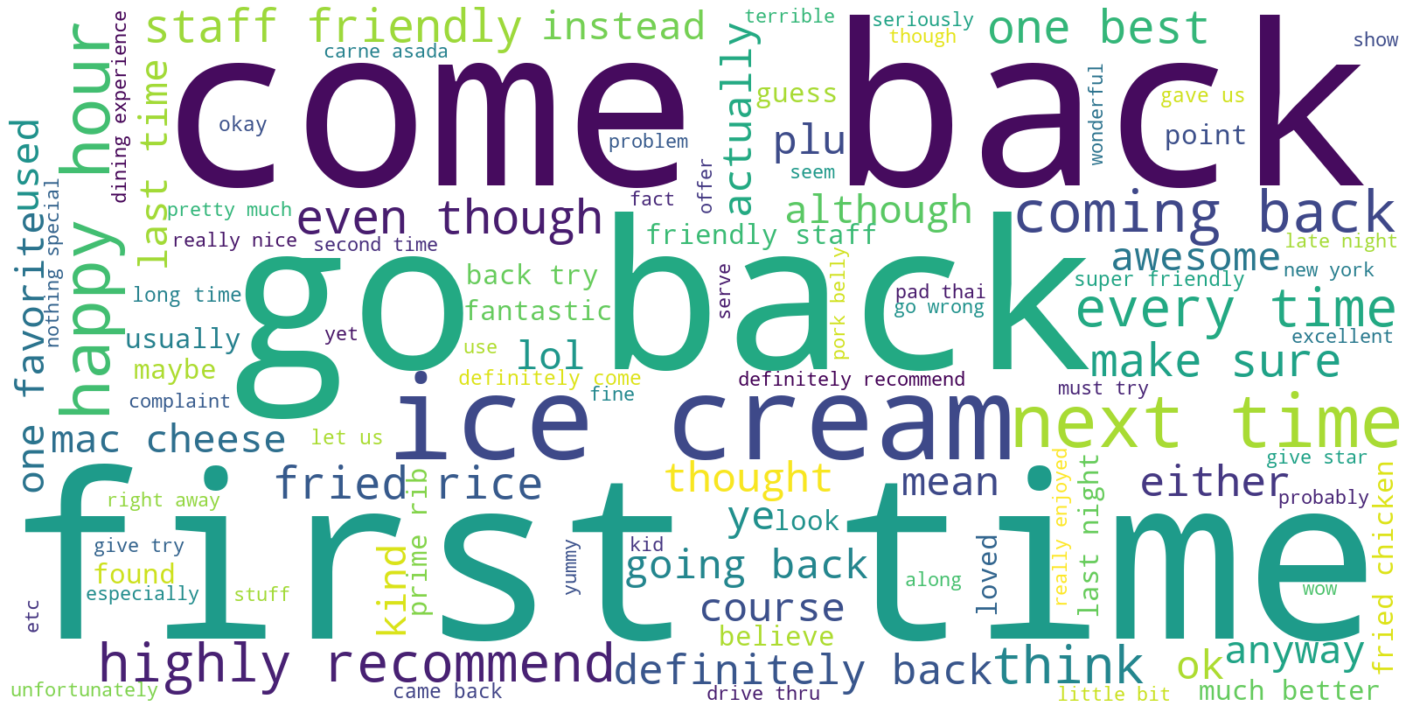

In [0]:
build_word_cloud(df=sample)

In [0]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date,text_clean,tokens_clean
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,2016-01-17 05:26:22,the food is always good and the prices are rea...,"['food', 'always', 'good', 'prices', 'reasonab..."
1,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,2013-12-28 22:28:08,their pettuccine was fresh-made in the morning...,"['pettuccine', 'morning', 'delicate', 'yummy',..."
2,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,2014-12-17 19:04:33,ended up here because raku was closed and it r...,"['ended', 'raku', 'closed', 'received', 'great..."
3,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,2018-05-28 20:56:05,"party of 3 ordered the fish tacos, pork belly ...","['party', 'ordered', 'fish', 'tacos', 'pork', ..."
4,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,ujHiaprwCQ5ewziu0Vi9rw,1.0,1,0,0,2013-12-07 00:14:06,we had dinner at the bellagio buffet last nigh...,"['dinner', 'bellagio', 'buffet', 'last', 'nigh..."


### Top 30 restaurants by ratings (with sufficient review count)

In [0]:
# What are the top restaurants in terms of stars
top = rev.groupby('business_id').agg({'business_id':['count'], 
                            'stars':['mean']}).sort_values([('business_id', 'count')], ascending=False)
top_30 = top[:30]

In [0]:
top_30 = pd.DataFrame(top_30.to_records())

In [0]:
top_30.columns = ['business_id', 'count', 'mean']

In [0]:
top_30 = top_30.sort_values('mean', ascending=False)
top_30 = top_30.reset_index(drop=True)
top_30

,business_id,count,mean
0,mDR12Hafvr84ctpsV6YLag,2583,4.636082
1,hihud--QRriCYZw1zZvW4g,3554,4.483399
2,3kdSl5mo9dWC4clrQjEDGg,3350,4.470746
3,2iTsRqUsPGRH1li1WVRvKQ,2094,4.449857
4,fL-b760btOaGa85OJ9ut3w,2952,4.416328
5,3BCsAgo_1i4xMuTyLKMLRQ,2264,4.295053
6,KskYqH1Bi7Z_61pH6Om8pg,4131,4.229726
7,3GEEy7RP6e4bT4LAiWFMFQ,2193,4.202462
8,RwMLuOkImBIqqYj4SSKSPg,3283,4.171489
9,l_GV0hgEoTUf70uJVT0_hg,2274,4.165347


In [0]:
inspection.head()

,serial_number,permit_number,facility_id_x,inspection_date,inspection_time,employee_id,inspection_demerits,inspection_grade,inspection_grade_new,inspection_result,...,stars,review_count,is_open,attributes,categories,zip_code,current_grade,current_demerits,previous_grade,date_previous
0,DA0001807,PR0000441,FA0002435,2007-12-05 00:00:00,2007-12-05 15:40:00,EE7000360,0.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
1,DA0001808,PR0000441,FA0002435,2008-04-21 00:00:00,2008-04-21 12:25:00,EE7000417,7.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
2,DA0001809,PR0000441,FA0002435,2009-02-12 00:00:00,2009-02-12 09:20:00,EE7000417,10.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
3,DA0001810,PR0000441,FA0002435,2009-09-21 00:00:00,2009-09-21 13:40:00,EE7000417,3.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
4,DA0001811,PR0000441,FA0002435,2010-06-14 00:00:00,2010-06-14 12:40:00,EE7000417,2.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00


In [0]:
top_30 = pd.merge(top_30, inspection[['business_id', 'name']].drop_duplicates(), how='left', on='business_id')

In [0]:
top_30

,business_id,count,mean,name
0,mDR12Hafvr84ctpsV6YLag,2583,4.636082,Mr Mamas
1,hihud--QRriCYZw1zZvW4g,3554,4.483399,Gangnam Asian BBQ Dining
2,3kdSl5mo9dWC4clrQjEDGg,3350,4.470746,Egg & I
3,2iTsRqUsPGRH1li1WVRvKQ,2094,4.449857,Carson Kitchen
4,fL-b760btOaGa85OJ9ut3w,2952,4.416328,Rollin Smoke Barbeque
5,3BCsAgo_1i4xMuTyLKMLRQ,2264,4.295053,SkinnyFATS
6,KskYqH1Bi7Z_61pH6Om8pg,4131,4.229726,Lotus of Siam
7,3GEEy7RP6e4bT4LAiWFMFQ,2193,4.202462,Pizza Rock
8,RwMLuOkImBIqqYj4SSKSPg,3283,4.171489,Tacos El Gordo
9,l_GV0hgEoTUf70uJVT0_hg,2274,4.165347,Eat.


### Bar plot of average ratings for top 10

In [0]:
top_10 = top_30.iloc[:10]

(0, 5)

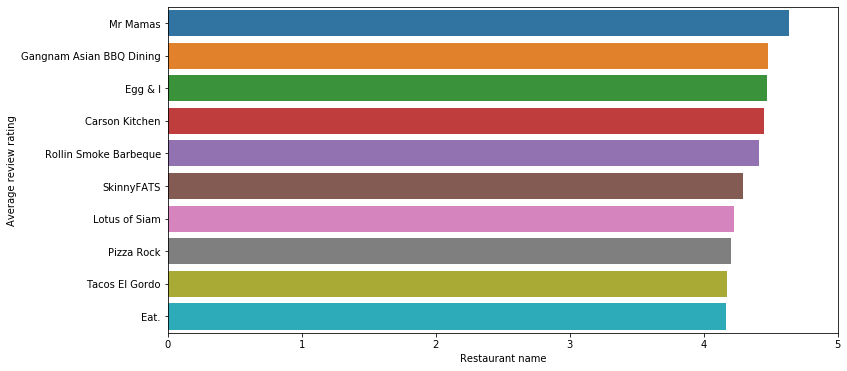

In [0]:
plt.figure(figsize=(12,6))
# Count Plot (a.k.a. Bar Plot)
x = top_10.name
sns.barplot(x='mean', y='name', data=top_10, order=x, orient='horizontal')

plt.xlabel('Restaurant name')
plt.ylabel('Average review rating')
plt.xlim(0,5)

### Word cloud for top 5

### Mr Mamas

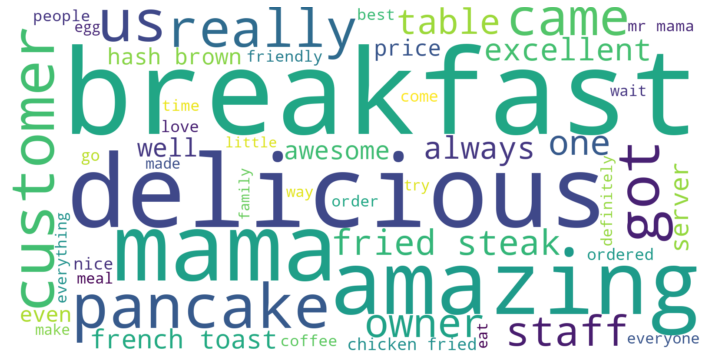

In [0]:
x = top_30.iloc[0, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

### Gangnam Asian

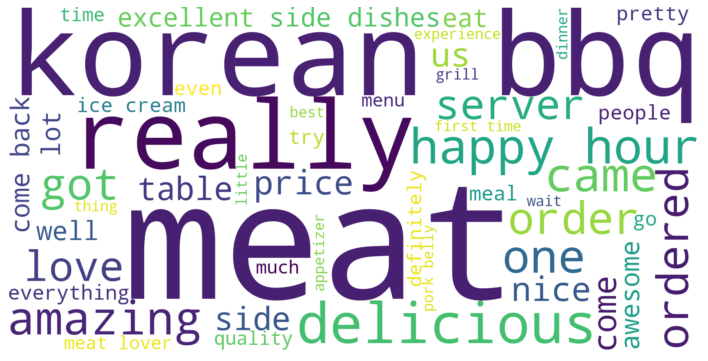

In [0]:
x = top_30.iloc[1, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

### Egg and I

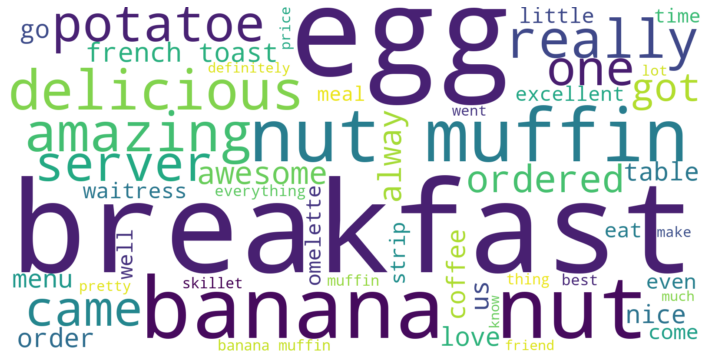

In [0]:
x = top_30.iloc[2, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

### Carson kitchen

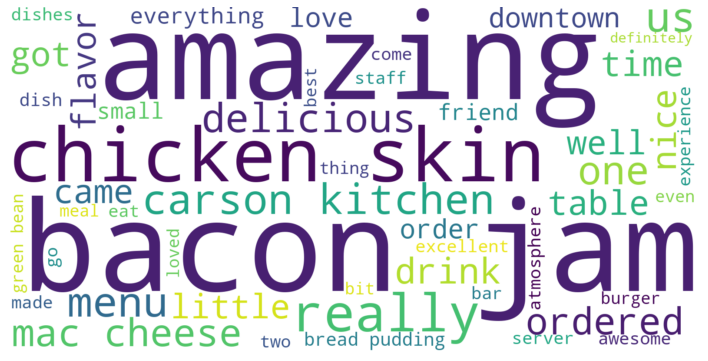

In [0]:
x = top_30.iloc[3, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

### Rolling Smokes

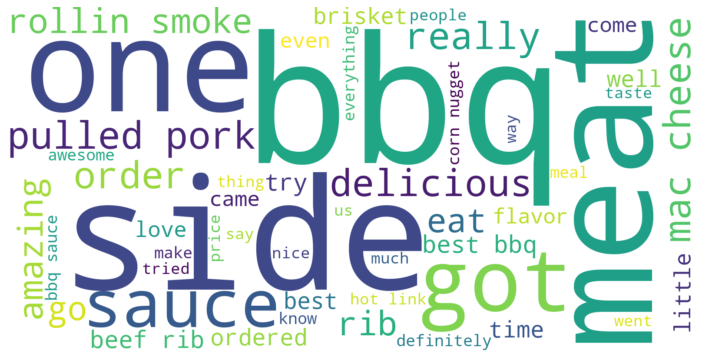

In [0]:
x = top_30.iloc[4, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

In [0]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date,text_clean,tokens_clean
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,2016-01-17 05:26:22,the food is always good and the prices are rea...,"['food', 'always', 'good', 'prices', 'reasonab..."
1,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,2013-12-28 22:28:08,their pettuccine was fresh-made in the morning...,"['pettuccine', 'morning', 'delicate', 'yummy',..."
2,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,2014-12-17 19:04:33,ended up here because raku was closed and it r...,"['ended', 'raku', 'closed', 'received', 'great..."
3,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,2018-05-28 20:56:05,"party of 3 ordered the fish tacos, pork belly ...","['party', 'ordered', 'fish', 'tacos', 'pork', ..."
4,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,ujHiaprwCQ5ewziu0Vi9rw,1.0,1,0,0,2013-12-07 00:14:06,we had dinner at the bellagio buffet last nigh...,"['dinner', 'bellagio', 'buffet', 'last', 'nigh..."


### Is there a relationship between review length and ratings

In [0]:
rev['review_length'] = rev.apply(lambda x: len(x.tokens_clean.split(',')), axis=1)

In [0]:
# Subsetting based on review length because of outliers
sample = rev[rev.review_length <= 100]

Text(0, 0.5, 'frequency')

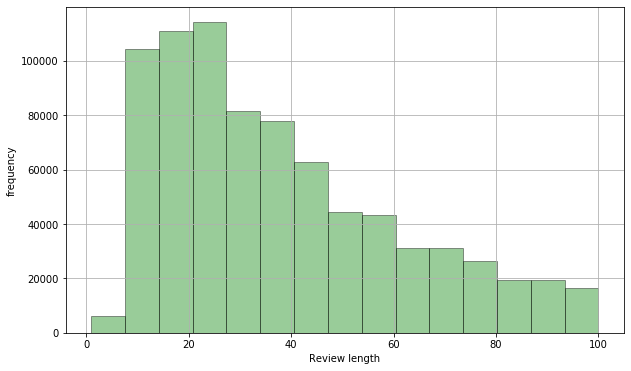

In [0]:
plt.figure(figsize=(10,6))
plt.grid()
sns.distplot(sample.review_length, kde=False, bins=15, color='green', hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlabel('Review length')
plt.ylabel('frequency')

#### Majority are between 10 and 40 words long

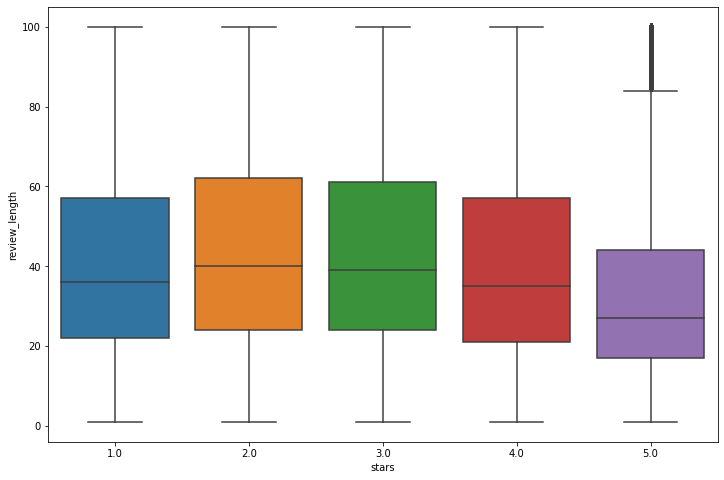

In [0]:
plt.figure(figsize=(12,8))
sns.boxplot(x='stars', y='review_length', data=sample)

#### With the exception of outliers, it seems the review length is shorter for higher ratings

## Inspections

In [0]:
inspection.head(10)

,serial_number,permit_number,facility_id_x,inspection_date,inspection_time,employee_id,inspection_demerits,inspection_grade,inspection_grade_new,inspection_result,...,stars,review_count,is_open,attributes,categories,zip_code,current_grade,current_demerits,previous_grade,date_previous
0,DA0001807,PR0000441,FA0002435,2007-12-05 00:00:00,2007-12-05 15:40:00,EE7000360,0.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
1,DA0001808,PR0000441,FA0002435,2008-04-21 00:00:00,2008-04-21 12:25:00,EE7000417,7.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
2,DA0001809,PR0000441,FA0002435,2009-02-12 00:00:00,2009-02-12 09:20:00,EE7000417,10.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
3,DA0001810,PR0000441,FA0002435,2009-09-21 00:00:00,2009-09-21 13:40:00,EE7000417,3.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
4,DA0001811,PR0000441,FA0002435,2010-06-14 00:00:00,2010-06-14 12:40:00,EE7000417,2.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
5,DA0001818,PR0000442,FA0002435,2007-12-05 00:00:00,2007-12-05 14:30:00,EE7000360,0.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
6,DA0001819,PR0000442,FA0002435,2008-04-21 00:00:00,2008-04-21 13:10:00,EE7000417,5.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
7,DA0001820,PR0000442,FA0002435,2009-02-12 00:00:00,2009-02-12 09:50:00,EE7000417,8.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
8,DA0001821,PR0000442,FA0002435,2009-09-21 00:00:00,2009-09-21 14:20:00,EE7000417,7.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00
9,DA0001822,PR0000442,FA0002435,2010-06-14 00:00:00,2010-06-14 13:15:00,EE7000417,6.0,A,A,Compliant,...,4.0,273.0,1.0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Coffee & Tea, Restaurants, Bakeries, Salad, Sa...",89109-8924,A,0.0,A,2020-01-30 00:00:00


### Distribution of demerits

Text(0, 0.5, 'frequency')

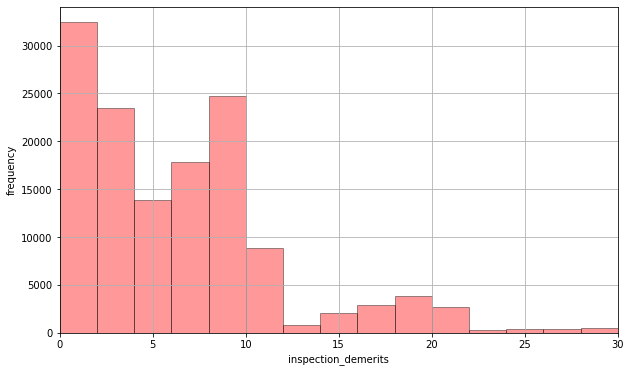

In [9]:
plt.figure(figsize=(10,6))
plt.grid()
dem = inspection[inspection.inspection_demerits.notna()].inspection_demerits
sns.distplot(dem, kde=False, color='red', hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlim(0,30)
plt.ylabel('frequency')

#### Appears somewhat tri-modal around 0-3, and roughly 17-21 demerits

In [0]:
inspection = inspection.sort_values(['business_id', 'inspection_date']).reset_index(drop=True)

In [53]:
inspection.tail(5)

,serial_number,permit_number,facility_id_x,inspection_date,inspection_time,employee_id,inspection_demerits,inspection_grade,inspection_grade_new,inspection_result,violations,record_updated,inspection_type,business_id,name,address_x,city,latitude_x,longitude_x,stars,review_count,is_open,attributes,categories,zip_code,current_grade,current_demerits,previous_grade,date_previous
137841,DAMVP1WAD,PR0023358,FA0011092,2017-03-31 00:00:00,2017-03-31 16:00:00,EE7000620,0.0,X,CLOSED,Closed with Fees,-1,2017-03-31 16:23:07,Survey,dA_SibUf2OsnU6jHYyC1iQ,Real Donuts,2212 E Cheyenne Ave,North Las Vegas,36.217997,-115.118965,4.0,42.0,1.0,"{'WiFi': ""u'no'"", 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lo...","Food, Donuts, Bakeries, Ice Cream & Frozen Yogurt",89030-8425,A,6.0,A,2019-07-18 00:00:00
137842,DAN32LQ1L,PR0122992,FA0083613,2019-10-08 00:00:00,2019-10-08 15:50:00,EE7001342,0.0,X,CLOSED,Closed without Fees,-1,2019-10-08 15:57:39,Survey,DyCv2ubxeygyOUWJ4lnewg,Sweetspot Nitrogen Ice Cream & Boba Tea,"6830 S Rainbow Blvd, Ste 140",Las Vegas,36.064832,-115.241737,4.5,236.0,1.0,"{'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'Tru...","Bubble Tea, Desserts, Food, Ice Cream & Frozen Yogurt, Coffee & Tea",89118,X,0.0,X,2019-10-08 00:00:00
137843,DAOMMLIG9,PR0115494,FA0077889,2017-09-08 00:00:00,2017-09-08 14:15:00,EE7001176,0.0,X,CLOSED,Closed without Fees,-1,2017-09-08 14:52:10,Survey,b1hmyz3gxWdhuWKkSdk3Ug,Clamato's & Beer,"2250 East Tropicana Ave, Ste 19",Las Vegas,36.101305,-115.121623,3.0,4.0,1.0,"{'RestaurantsGoodForGroups': 'True', 'Ambience': 'None', 'OutdoorSeating': 'True', 'NoiseLevel':...","Restaurants, Mexican, Food, Sports Bars, Nightlife, Bars, Desserts",89119,X,0.0,X,2017-09-08 00:00:00
137844,DAOQUKPFS,PR0006391,FA0076255,2018-05-22 00:00:00,2018-05-22 11:00:00,EE7001228,0.0,X,CLOSED,Closed without Fees,-1,2018-05-22 11:28:42,Survey,7wst00GRGs8qsuf2QtsnaA,Champagne's,3557 S Maryland Pkwy,Las Vegas,36.124837,-115.137709,4.0,129.0,1.0,"{'NoiseLevel': ""u'average'"", 'RestaurantsPriceRange2': '1', 'BikeParking': 'False', 'BusinessAcc...","Lounges, Bars, Karaoke, Nightlife, Dive Bars",89169,A,8.0,A,2019-08-21 00:00:00
137845,DAQ0KYMJE,PR0108848,FA0073341,2017-12-07 00:00:00,2017-12-07 11:40:00,EE7001297,0.0,X,CLOSED,Closed with Fees,-1,2017-12-07 12:03:19,Survey,8Qs6f026h6sU6MAzL7JJjg,Viet Bistro,"4145 S Grand Canyon Dr, Ste A-102",Las Vegas,36.114589,-115.307513,3.5,119.0,0.0,"{'RestaurantsPriceRange2': '1', 'BikeParking': 'True', 'WiFi': ""'no'"", 'BusinessAcceptsCreditCar...","Food, Specialty Food, Ethnic Food, Vietnamese, Restaurants",89148,X,0.0,X,2017-12-07 00:00:00


#### There is not much difference in distribution of demerits accross cities

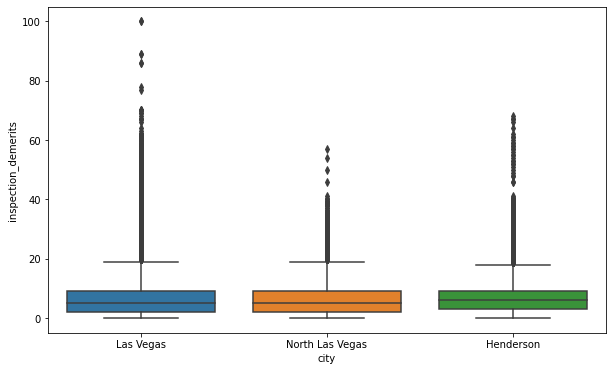

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='city', y='inspection_demerits', data=inspection, order=('Las Vegas', 'North Las Vegas', 'Henderson'))
# plt.ylim(0,30)

#### The top 10 restaurants (according to review ratings) have median demerits around acceptable values with more concerning outliers in the lower ranks

In [0]:
subset = inspection[inspection.business_id.isin(top_10.business_id)].reset_index(drop=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

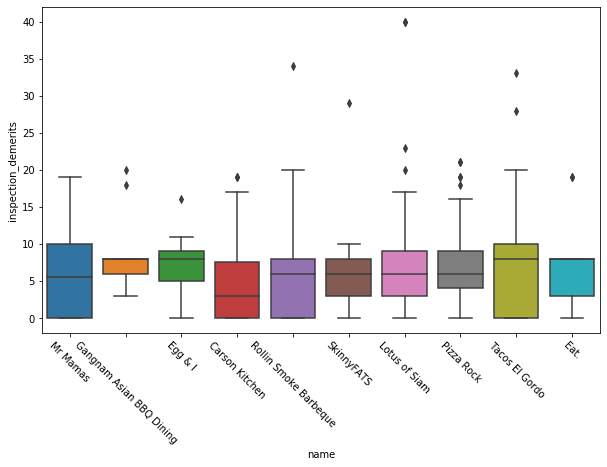

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot(x='name', y='inspection_demerits', data=subset, order=top_10.name)
plt.xticks(rotation=-45)

#### Distribution of inspection_type counts over the years indicates some concern about the reinspections for years prior to 2011 and also shows that reinspections are roughly one-tenth of inspections per year

In [0]:
inspection.inspection_date = inspection.apply(lambda x: pd.to_datetime(x.inspection_date), axis=1)
inspection['year'] = pd.DatetimeIndex(inspection.inspection_date).year

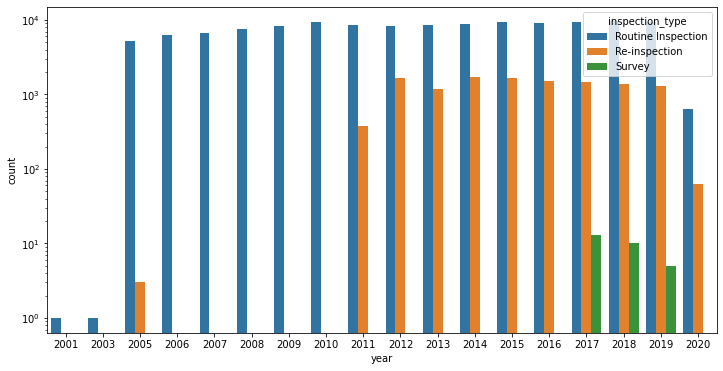

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='year', data=inspection, hue='inspection_type')
plt.yscale('log')

### Distribution of Inspection grades

In [0]:
inspection.loc[~inspection.inspection_grade.isin(['A','B','C','P']), 'inspection_grade'] = 'other'

In [0]:
sub = inspection[inspection.year.isin(['2015', '2016', '2017','2018','2019'])]

<Figure size 864x432 with 0 Axes>

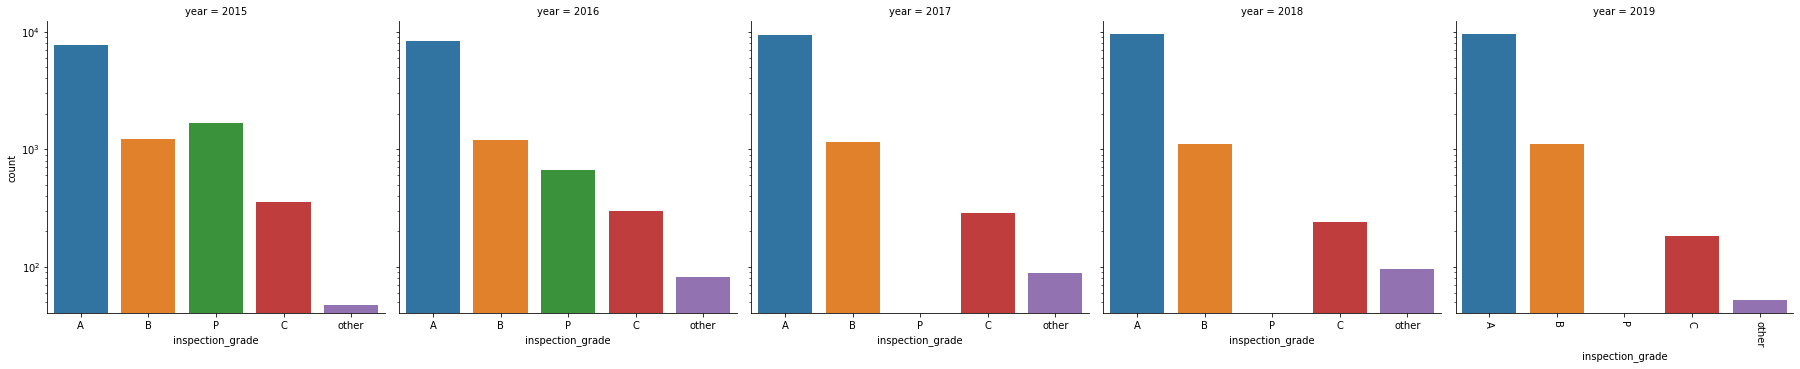

In [67]:
plt.figure(figsize=(12,6))
sns.catplot(x='inspection_grade', data=sub, order=inspection.inspection_grade.value_counts().index, col='year', kind='count')
# plt.grid()
plt.yscale('log')
plt.xticks(rotation=-90)
plt.show()

In [0]:
rev.date = pd.to_datetime(rev.date)

#### The most valuable inspection result types to us are 'compliant', 'A grade', 'B downgrade', 'C downgrade', 'Closed with fees', 'Approved', 'No further action', 'Closed without fees', 'Inactive status', 'Follow up required', and 'Permit suspended'

In [0]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date,text_clean,tokens_clean,review_length
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,2016-01-17 05:26:22,the food is always good and the prices are rea...,"['food', 'always', 'good', 'prices', 'reasonab...",37
1,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,2013-12-28 22:28:08,their pettuccine was fresh-made in the morning...,"['pettuccine', 'morning', 'delicate', 'yummy',...",15
2,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,2014-12-17 19:04:33,ended up here because raku was closed and it r...,"['ended', 'raku', 'closed', 'received', 'great...",47
3,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,2018-05-28 20:56:05,"party of 3 ordered the fish tacos, pork belly ...","['party', 'ordered', 'fish', 'tacos', 'pork', ...",57
4,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,ujHiaprwCQ5ewziu0Vi9rw,1.0,1,0,0,2013-12-07 00:14:06,we had dinner at the bellagio buffet last nigh...,"['dinner', 'bellagio', 'buffet', 'last', 'nigh...",67


In [0]:
inspection.tail(20)

,serial_number,permit_number,facility_id_x,inspection_date,inspection_time,employee_id,inspection_demerits,inspection_grade,inspection_grade_new,inspection_result,...,review_count,is_open,attributes,categories,zip_code,current_grade,current_demerits,previous_grade,date_previous,year
137826,DA0276013,PR0006285,FA0004345,2010-03-17,2010-03-17 14:30:00,EE7000857,10.0,A,A,Compliant,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,0.0,B,2016-03-30 00:00:00,2010
137827,DA0276000,PR0006284,FA0004345,2011-03-15,2011-03-15 14:30:00,EE7000857,15.0,B,B,B Downgrade,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,8.0,B,2016-03-30 00:00:00,2011
137828,DA0276001,PR0006284,FA0004345,2011-05-06,2011-05-06 22:25:00,EE7000857,3.0,A,A,Compliant,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,8.0,B,2016-03-30 00:00:00,2011
137829,DA0276014,PR0006285,FA0004345,2011-05-06,2011-05-06 23:05:00,EE7000857,8.0,A,A,Compliant,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,0.0,B,2016-03-30 00:00:00,2011
137830,DA1012920,PR0006284,FA0004345,2012-09-19,2012-09-19 11:30:00,EE7001012,18.0,B,B,B Downgrade,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,8.0,B,2016-03-30 00:00:00,2012
137831,DA1029487,PR0006285,FA0004345,2012-11-30,2012-11-30 23:30:00,EE7001012,14.0,B,B,B Downgrade,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,0.0,B,2016-03-30 00:00:00,2012
137832,DA1029486,PR0006284,FA0004345,2012-11-30,NaN,EE7001089,22.0,C,C,C Downgrade,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,8.0,B,2016-03-30 00:00:00,2012
137833,DA1035870,PR0006285,FA0004345,2012-12-28,NaN,EE7001012,4.0,P,PASS,Compliant,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,0.0,B,2016-03-30 00:00:00,2012
137834,DA1036087,PR0006284,FA0004345,2012-12-28,NaN,EE7001061,9.0,P,PASS,Compliant,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,8.0,B,2016-03-30 00:00:00,2012
137835,DA1110455,PR0006284,FA0004345,2013-10-09,2013-10-09 21:20:00,EE7000857,9.0,A,A,Compliant,...,25.0,0.0,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Bars, Gay Bars, Dance Clubs, Nightlife",89119-6529,A,8.0,B,2016-03-30 00:00:00,2013


In [0]:
inspection.serial_number.nunique()

119764

In [0]:
inspection.shape[0]

137846

In [0]:
inspection.serial_number.value_counts()

DA0473895    5
DAET6EBGQ    5
DA1553368    5
DAZURGNLZ    5
DA1543173    5
            ..
DADHTY2VI    1
DA1455685    1
DA0521488    1
DAMN9NU8Q    1
DA1291949    1
Name: serial_number, Length: 119764, dtype: int64

In [0]:
inspection[inspection.serial_number=='DAL5NHOHI']

,serial_number,permit_number,facility_id_x,inspection_date,inspection_time,employee_id,inspection_demerits,inspection_grade,inspection_grade_new,inspection_result,...,review_count,is_open,attributes,categories,zip_code,current_grade,current_demerits,previous_grade,date_previous,year
24508,DAL5NHOHI,PR0107202,FA0006647,2017-06-20,2017-06-20 08:45:00,EE7001228,6.0,A,A,A Grade,...,1949.0,1.0,"{'Alcohol': ""u'full_bar'"", 'NoiseLevel': ""u'av...","Event Planning & Services, Arts & Entertainmen...",89101-5603,A,3.0,A,2019-03-23 00:00:00,2017
47419,DAL5NHOHI,PR0107202,FA0006647,2017-06-20,2017-06-20 08:45:00,EE7001228,6.0,A,A,A Grade,...,129.0,1.0,"{'RestaurantsGoodForGroups': 'True', 'ByAppoin...","Cocktail Bars, Bars, Active Life, Aquariums, N...",89101-5603,A,3.0,A,2019-03-23 00:00:00,2017
50176,DAL5NHOHI,PR0107202,FA0006647,2017-06-20,2017-06-20 08:45:00,EE7001228,6.0,A,A,A Grade,...,343.0,1.0,"{'RestaurantsTakeOut': 'False', 'RestaurantsPr...","Buffets, Restaurants",89101-5603,A,3.0,A,2019-03-23 00:00:00,2017
74263,DAL5NHOHI,PR0107202,FA0006647,2017-06-20,2017-06-20 08:45:00,EE7001228,6.0,A,A,A Grade,...,274.0,1.0,"{'NoiseLevel': ""'average'"", 'WiFi': ""'free'"", ...","Sandwiches, Steakhouses, Food, American (Tradi...",89101-5603,A,3.0,A,2019-03-23 00:00:00,2017
121644,DAL5NHOHI,PR0107202,FA0006647,2017-06-20,2017-06-20 08:45:00,EE7001228,6.0,A,A,A Grade,...,40.0,1.0,"{'RestaurantsPriceRange2': '3', 'BusinessParki...","Massage, Restaurants, Beauty & Spas, Hair Salo...",89101-5603,A,3.0,A,2019-03-23 00:00:00,2017


### Sentiment analysis

In [0]:
from textblob import TextBlob

In [0]:
# rev['polarity'] = rev['text_clean'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [0]:
# rev.to_csv(r"C:/users/abdul/Desktop/review_tokenized.csv")

In [69]:
rev = pd.read_csv(r"/content/drive/My Drive/DPA Project files/review_tokenized.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
rev.date = pd.to_datetime(rev.date)
rev.drop(columns=[rev.columns[0]], inplace=True)

### Distribution of sentiment polarity

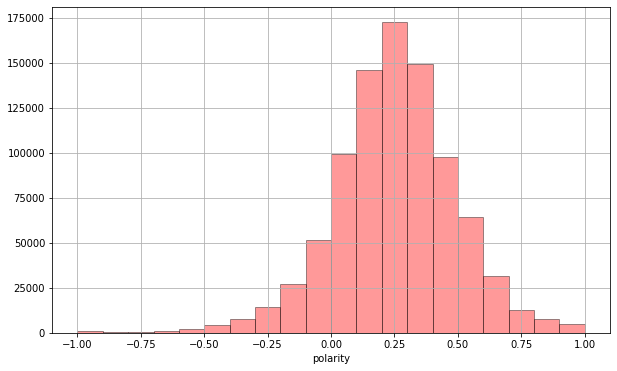

In [71]:
plt.figure(figsize=(10,6))
sns.distplot(rev.polarity, kde=False, color='r', bins=20, hist_kws=dict(edgecolor="k", linewidth=1))
plt.grid()

#### This shows that for most reviews in the dataset the sentiment is centered around 0.1 to 0.4 which is fairlly positive

In [0]:
def get_past_reviews(serial_number, window=90):
    upper_date = inspection[inspection.serial_number==serial_number].inspection_date
    upper_date = upper_date.iloc[0]
    lower_date = upper_date - pd.to_timedelta(window, unit='d')
    b_id = inspection[inspection.serial_number==serial_number].business_id
    b_id = b_id.iloc[0]
    return (rev[(rev.business_id == b_id) & (rev.date.between(lower_date, upper_date))])
    

In [0]:
get_past_reviews('DA1677969')

In [0]:
# pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [74]:
inspection.shape

(137846, 30)

In [0]:
# sample = inspection.sample(50000, random_state=42)
# sample['average_polarity'] = np.NAN
# for serial in sample.serial_number:
#     reviews = get_past_reviews(serial)
#     try:
#         avg_polarity = reviews.polarity.mean()
#         sample.loc[sample.serial_number==serial, 'average_polarity'] = avg_polarity
#     except:
#         continue


In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_polarity', y='inspection_demerits', data=sample)

In [0]:
sample.head()

,serial_number,permit_number,facility_id_x,inspection_date,inspection_time,employee_id,inspection_demerits,inspection_grade,inspection_grade_new,inspection_result,...,is_open,attributes,categories,zip_code,current_grade,current_demerits,previous_grade,date_previous,year,average_polarity
41624,DA1027811,PR0021106,FA0010435,2012-11-26,2012-11-26 11:30:00,EE7001061,16.0,B,B,B Downgrade,...,1.0,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Seafood, American (Traditional), Restaurants, ...",89101-6823,A,0.0,A,2019-06-11 00:00:00,2012,0.220627
73345,DA1120744,PR0015706,FA0008394,2013-11-07,2013-11-07 14:50:00,EE7001145,10.0,A,A,Compliant,...,1.0,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Restaurants, American (Traditional), Food, San...",89169-6532,A,8.0,A,2019-06-27 00:00:00,2013,0.292345
47495,DAR0AF4IH,PR0011485,FA0006647,2018-10-02,2018-10-02 12:30:00,EE7001254,6.0,A,A,A Grade,...,1.0,"{'RestaurantsGoodForGroups': 'True', 'ByAppoin...","Cocktail Bars, Bars, Active Life, Aquariums, N...",89101-5603,A,0.0,A,2019-08-10 00:00:00,2018,0.141237
113734,DA1052651,PR0020101,FA0077343,2013-03-05,2013-03-05 14:30:00,EE7000691,5.0,A,A,Compliant,...,1.0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'F...","Caterers, Vegetarian, Sandwiches, Salad, Event...",89052,A,9.0,A,2020-01-23 00:00:00,2013,NaN
77973,DA1198194,PR0023008,FA0074666,2014-07-15,2014-07-15 11:20:00,EE7000674,6.0,A,A,Compliant,...,1.0,"{'RestaurantsReservations': 'False', 'Business...","Chinese, Korean, Restaurants",89146,A,3.0,A,2019-11-21 00:00:00,2014,NaN


### Unigrams and Bigrams

In [0]:
def get_corpus(df):
    corpus = []
    # generating the corpus with repititions allowed
    for i in df.tokens_clean:
        all_words = []
        try:
            a = i.split(',')
        except: continue
        for j in a:
            try:
                j = re.findall('[a-z]', j)
                word = ''.join(j)
                all_words.append(word)
            except:
                continue
        all_words = list(filter(lambda a: a not in ['las', 'vegas','restaurant'], all_words))
        all_words_ = ' '.join(all_words)
        corpus.append(all_words_)
    return corpus

In [0]:
corpus = get_corpus(rev)

In [0]:
corpus = pd.Series(corpus, name='corp')

In [0]:
corpus.head()

0    food always good prices reasonable although exactly like snack bar limited menu walk counter pla...
1    pettuccine morning delicate yummy owner staffs super kind delightful also veal piccata classic love
2    ended raku closed received great ratings yelp glad came one better meals started mushroom dish l...
3    party ordered fish tacos pork belly banh mi corn beef hash benedict bam ham everything delicious...
4    dinner bellagio buffet last night service server great kind forgot us towards end visit food col...
Name: corp, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Obtaining unigrams
def top_unigrams(corpus, n=20):
    vectorizer = CountVectorizer().fit(corpus)
    trans = vectorizer.transform(corpus)
    sum_words = trans.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return (pd.DataFrame(words_freq[:n], columns=['word', 'frequency']))

In [0]:
unigram = top_unigrams(corpus)

In [0]:
# obtaining bigrams
def top_bigrams(corpus, n=20):
    vectorizer = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    trans = vectorizer.transform(corpus)
    sum_words = trans.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return (pd.DataFrame(words_freq[:n], columns=['word', 'frequency']))

In [0]:
bigrams = top_bigrams(corpus)

### Top 20 Unigrams

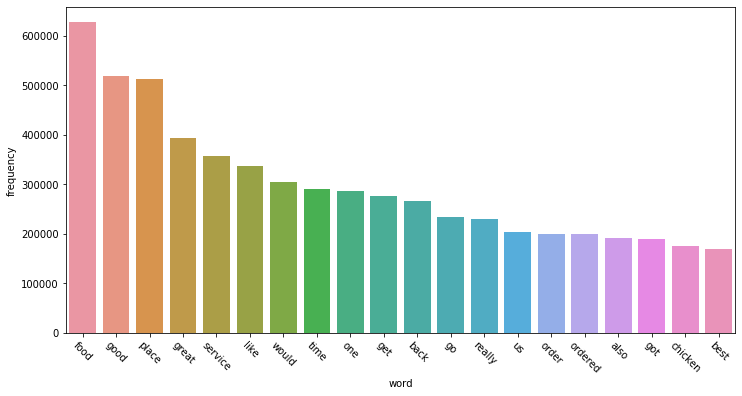

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(x='word' , y='frequency', data=unigram)
plt.xticks(rotation=-45)
plt.show()

### Top 20 bigrams

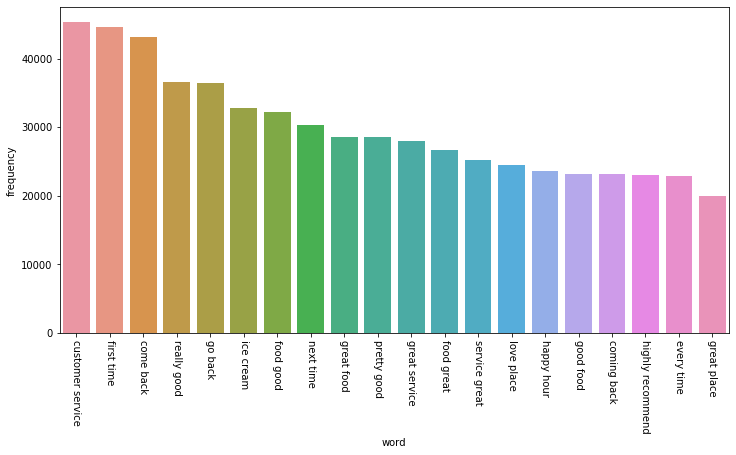

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(x='word' , y='frequency', data=bigrams)
plt.xticks(rotation=-90)
plt.show()

In [0]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date,text_clean,tokens_clean,review_length,polarity,city
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0.0,0.0,0.0,2016-01-17 05:26:22,the food is always good and the prices are reasonable. although it is not exactly a restaurant ...,"['food', 'always', 'good', 'prices', 'reasonable', 'although', 'exactly', 'restaurant', 'like', ...",37.0,0.272321,Las Vegas
1,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0.0,0.0,0.0,2016-01-17 05:26:22,the food is always good and the prices are reasonable. although it is not exactly a restaurant ...,"['food', 'always', 'good', 'prices', 'reasonable', 'although', 'exactly', 'restaurant', 'like', ...",37.0,0.272321,Las Vegas
2,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0.0,0.0,0.0,2016-01-17 05:26:22,the food is always good and the prices are reasonable. although it is not exactly a restaurant ...,"['food', 'always', 'good', 'prices', 'reasonable', 'although', 'exactly', 'restaurant', 'like', ...",37.0,0.272321,Las Vegas
3,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0.0,0.0,0.0,2016-01-17 05:26:22,the food is always good and the prices are reasonable. although it is not exactly a restaurant ...,"['food', 'always', 'good', 'prices', 'reasonable', 'although', 'exactly', 'restaurant', 'like', ...",37.0,0.272321,Las Vegas
4,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0.0,0.0,0.0,2016-01-17 05:26:22,the food is always good and the prices are reasonable. although it is not exactly a restaurant ...,"['food', 'always', 'good', 'prices', 'reasonable', 'although', 'exactly', 'restaurant', 'like', ...",37.0,0.272321,Las Vegas


In [0]:
rev = pd.merge(rev, inspection[['business_id', 'city']], on='business_id', how='left')

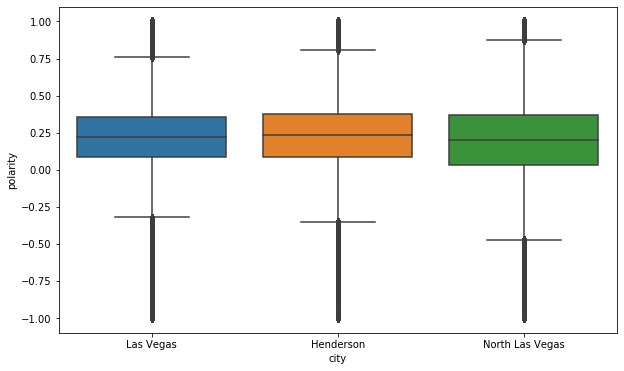

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot(x='city', y='polarity', data=rev[['city', 'polarity']])
plt.show()